<a href="https://colab.research.google.com/github/pchunter97/clasificador_noticias/blob/LSTM/LSTM_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#División del conjunto de datos

In [1]:
#Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize



Leer el archivo

In [3]:
data_preprocesed = np.load("/content/drive/MyDrive/FakesNews/dataset_preprocesado.npy")
data_cleaned = pd.read_csv("/content/drive/MyDrive/FakesNews/dataset_final.csv")


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9294 non-null   int64 
 1   clase       9294 non-null   int64 
 2   texto       9294 non-null   object
dtypes: int64(2), object(1)
memory usage: 218.0+ KB


In [4]:
y_train_ohe = label_binarize(data_cleaned['clase'], classes=[0,1])

In [80]:
x_train,x_test,y_train, y_test = train_test_split(data_preprocesed,y_train_ohe,test_size=0.2,random_state=100)

In [82]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([3308, 4127]))

In [ ]:
print("X_train info",x_train.shape)
print("\n\n\nX_test info",x_test.shape)
print("\n\n\nY_train info",y_train.shape)
print("\n\n\nY_test info",y_test.shape)

#Función F1

In [137]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#Implementación del modelo


In [147]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,GlobalMaxPool1D, Flatten, Concatenate, MaxPooling1D
from keras.layers import LSTM, LeakyReLU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [200]:
from os import name
from keras.engine.input_layer import Input

from sklearn import metrics
from keras.backend import dropout

from keras.layers.core.spatial_dropout import SpatialDropout2D, SpatialDropout1D


model = Sequential()
model.add(LeakyReLU(0.1))
model.add(Embedding(100000,30,input_length=300,embeddings_initializer='GlorotNormal'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True,name= 'lstm_layer'))
# model.add(MaxPooling1D(padding='same',pool_size=3,name='capa 1'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
# model.add(LSTM(64,activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(65,activation='relu'))
# model.add(LSTM(32,activation='relu'))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Flatten())

model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["acc",f1_m,precision_m,recall_m])



In [ ]:
x_train.shape

In [201]:
model.build(input_shape=(None,300))

In [152]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f0c4fafb650>>

In [202]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["acc",f1_m,precision_m,recall_m])


In [203]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test,y_test), verbose=1)

Epoch 1/100
233/233 [==============================] - 90s 375ms/step - loss: 0.6878 - acc: 0.5549 - f1_m: 0.7091 - precision_m: 0.5554 - recall_m: 0.9971 - val_loss: 0.6840 - val_acc: 0.5842 - val_f1_m: 0.7300 - val_precision_m: 0.5803 - val_recall_m: 1.0000
Epoch 2/100
233/233 [==============================] - 87s 375ms/step - loss: 0.6848 - acc: 0.5549 - f1_m: 0.7084 - precision_m: 0.5543 - recall_m: 0.9993 - val_loss: 0.6807 - val_acc: 0.5842 - val_f1_m: 0.7300 - val_precision_m: 0.5803 - val_recall_m: 1.0000
Epoch 3/100
233/233 [==============================] - 87s 371ms/step - loss: 0.6816 - acc: 0.5532 - f1_m: 0.7027 - precision_m: 0.5560 - recall_m: 0.9734 - val_loss: 0.6774 - val_acc: 0.5842 - val_f1_m: 0.7300 - val_precision_m: 0.5803 - val_recall_m: 1.0000
Epoch 4/100
233/233 [==============================] - 87s 374ms/step - loss: 0.6809 - acc: 0.5548 - f1_m: 0.7099 - precision_m: 0.5550 - recall_m: 0.9989 - val_loss: 0.6772 - val_acc: 0.5842 - val_f1_m: 0.7300 - val_pre

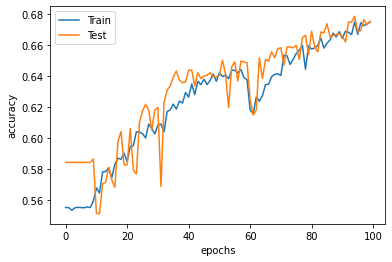

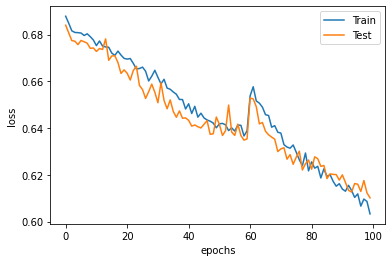

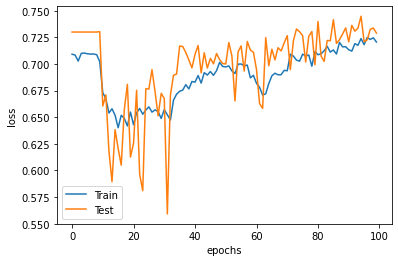

In [204]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

In [ ]:
pred = network.predict(x_test)

In [ ]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [ ]:
from sklearn.metrics import f1_score, classification_report
f1_score(pred,y_test)

0.8300359712230216

In [ ]:
new_report = classification_report(y_test,pred,target_names=['0','1'])
print(new_report)

Training Accuracy: 0.8572
Testing Accuracy:  0.8065


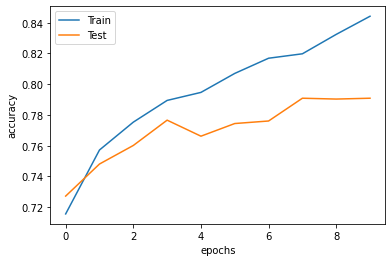

In [ ]:
loss, accuracy = network.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

In [ ]:
network.save("/content/drive/MyDrive/FakesNews/LSTM.h5")

In [ ]:
#test 1
new = np.array(x_test[200]).reshape(1,-1)
print(network.predict(new))